In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
# Set plot style for consistency
plt.rcParams.update({
    'legend.fontsize': 14,  # Legend font size
    'axes.labelsize': 14,   # Axis label font size
    'xtick.labelsize': 12,  # X-axis tick label size
    'ytick.labelsize': 12   # Y-axis tick label size
})
plt.rcParams['image.cmap'] = 'viridis'

In [6]:
# Load ML.npz file (update the path as needed)
ml_data = np.load('../runs/KLbAx_deblurring_ML/20250613-160217/ML.npz', allow_pickle=True)
norm_fval = ml_data['norm_fval_ML']
iteration_times = ml_data['iteration_times_ML']
cc_activated = ml_data['cc_activated']  # Should be shape (num_iters, num_levels)

# Always use the 0-th element for each iteration, regardless of shape
cc_activated_0 = np.array([row[0] if isinstance(row, (list, np.ndarray)) else row for row in cc_activated])

# Find indices where CC failed (0-th level not activated)
cc_failed_idx = np.where(~cc_activated_0)[0]

# Compute cumulative times
cum_times = np.cumsum(iteration_times)

In [7]:
# Load SL.npz file (update the path as needed)
sl_data = np.load('../runs/KLbAx_deblurring_SL/20250613-171914/SL.npz', allow_pickle=True)
norm_fval_SL = sl_data['norm_fval_SL']
iteration_times_SL = sl_data['iteration_times_SL']
cum_times_SL = np.cumsum(iteration_times_SL)

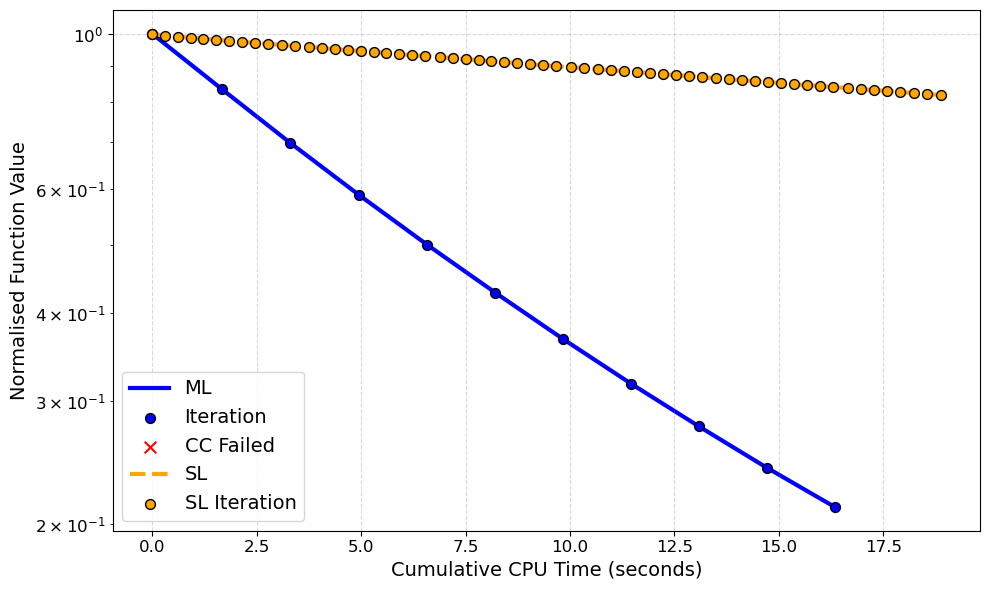

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(cum_times, norm_fval, linestyle='-', linewidth=3, label='ML', color='blue', zorder=1)
plt.scatter(cum_times, norm_fval, color='blue', edgecolors='black', s=50, marker='o', label='Iteration', zorder=2)
plt.scatter(cum_times[cc_failed_idx], norm_fval[cc_failed_idx],
            color='red', s=70, marker='x', label='CC Failed', zorder=3)

plt.plot(cum_times_SL, norm_fval_SL, linestyle='--', linewidth=3, label='SL', color='orange', zorder=1)
plt.scatter(cum_times_SL, norm_fval_SL, color='orange', edgecolors='black', s=50, marker='o', label='SL Iteration', zorder=2)

plt.xlabel('Cumulative CPU Time (seconds)')
plt.ylabel('Normalised Function Value')
plt.yscale('log')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.show()